In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Empezamos con el Analisis 

In [2]:
url = "../data/raw/marketing_data_simulated.csv"
df = pd.read_csv(url)

In [3]:
df

,Date,Action_Type,Language,Content_Category,Day_of_Week,Impressions,CTR,Clicks
0,2023-01-02,Instagram Post,English,Partners,Monday,1759,0.016391,29
1,2023-01-02,LinkedIn Post,Spanish,Events,Monday,1368,0.008438,12
2,2023-01-03,Instagram Post,Spanish,Humor,Tuesday,1573,0.016354,26
3,2023-01-03,LinkedIn Post,English,Events,Tuesday,1516,0.007464,11
4,2023-01-04,Instagram Post,Spanish,Partners,Wednesday,1821,0.013398,24
...,...,...,...,...,...,...,...,...
1111,2024-12-27,LinkedIn Post,Spanish,Platform Improvements,Friday,454,0.003422,2
1112,2024-12-30,Instagram Post,English,Humor,Monday,1153,0.013793,16
1113,2024-12-30,LinkedIn Post,English,Events,Monday,849,0.004059,3
1114,2024-12-31,Instagram Post,English,Events,Tuesday,1338,0.007941,11


In [4]:
df.head()

,Date,Action_Type,Language,Content_Category,Day_of_Week,Impressions,CTR,Clicks
0,2023-01-02,Instagram Post,English,Partners,Monday,1759,0.016391,29
1,2023-01-02,LinkedIn Post,Spanish,Events,Monday,1368,0.008438,12
2,2023-01-03,Instagram Post,Spanish,Humor,Tuesday,1573,0.016354,26
3,2023-01-03,LinkedIn Post,English,Events,Tuesday,1516,0.007464,11
4,2023-01-04,Instagram Post,Spanish,Partners,Wednesday,1821,0.013398,24


In [5]:
df.tail()

,Date,Action_Type,Language,Content_Category,Day_of_Week,Impressions,CTR,Clicks
1111,2024-12-27,LinkedIn Post,Spanish,Platform Improvements,Friday,454,0.003422,2
1112,2024-12-30,Instagram Post,English,Humor,Monday,1153,0.013793,16
1113,2024-12-30,LinkedIn Post,English,Events,Monday,849,0.004059,3
1114,2024-12-31,Instagram Post,English,Events,Tuesday,1338,0.007941,11
1115,2024-12-31,LinkedIn Post,English,Platform Improvements,Tuesday,953,0.007764,7


In [6]:
df.shape

(1116, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1116 non-null   object 
 1   Action_Type       1116 non-null   object 
 2   Language          1116 non-null   object 
 3   Content_Category  1116 non-null   object 
 4   Day_of_Week       1116 non-null   object 
 5   Impressions       1116 non-null   int64  
 6   CTR               1116 non-null   float64
 7   Clicks            1116 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 69.9+ KB


## Verificamos que no hay Nulos

In [8]:
df.isnull().sum()

Date                0
Action_Type         0
Language            0
Content_Category    0
Day_of_Week         0
Impressions         0
CTR                 0
Clicks              0
dtype: int64

## Empezar transformacion  de datos 

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Year'] = df['Date'].dt.to_period('M')

## Analisis descriptivo

In [10]:
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Date':
        print(f"{col}: {df[col].nunique()} valores únicos")
        print(f"  Valores: {df[col].unique()}")
        print()

Action_Type: 3 valores únicos
  Valores: ['Instagram Post' 'LinkedIn Post' 'Newsletter']

Language: 7 valores únicos
  Valores: ['English' 'Spanish' 'French' 'Italian' 'Spanish (Spain)'
 'Spanish (LatAm)' 'Portuguese']

Content_Category: 6 valores únicos
  Valores: ['Partners' 'Events' 'Humor' 'Marketing Automation'
 'Platform Improvements' 'Monthly Newsletter']

Day_of_Week: 7 valores únicos
  Valores: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Sunday' 'Saturday']



## Canal de distribución

In [11]:
print(df['Action_Type'].value_counts())
print(f"\nPorcentajes:")
print(df['Action_Type'].value_counts(normalize=True) * 100)

Action_Type
Instagram Post    522
LinkedIn Post     522
Newsletter         72
Name: count, dtype: int64

Porcentajes:
Action_Type
Instagram Post    46.774194
LinkedIn Post     46.774194
Newsletter         6.451613
Name: proportion, dtype: float64


## Descripcion

In [12]:
df.describe()

,Date,Impressions,CTR,Clicks,Month,Year
count,1116,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,2023-12-31 19:21:17.419354880,2469.619176,0.020529,105.397849,6.501792,2023.501792
min,2023-01-02 00:00:00,155.000000,0.000975,0.000000,1.000000,2023.000000
25%,2023-07-03 00:00:00,1509.750000,0.010522,16.000000,4.000000,2023.000000
50%,2024-01-01 12:00:00,1850.500000,0.014112,25.000000,7.000000,2024.000000
75%,2024-07-02 00:00:00,2303.000000,0.018480,42.000000,10.000000,2024.000000
max,2024-12-31 00:00:00,17357.000000,0.157108,2512.000000,12.000000,2024.000000
std,NaN,2369.047376,0.023838,304.042624,3.449442,0.500221


In [13]:
print("\n--- Estadísticas descriptivas de métricas ---")
print(df[['Impressions', 'CTR', 'Clicks']].describe())


--- Estadísticas descriptivas de métricas ---
        Impressions          CTR       Clicks
count   1116.000000  1116.000000  1116.000000
mean    2469.619176     0.020529   105.397849
std     2369.047376     0.023838   304.042624
min      155.000000     0.000975     0.000000
25%     1509.750000     0.010522    16.000000
50%     1850.500000     0.014112    25.000000
75%     2303.000000     0.018480    42.000000
max    17357.000000     0.157108  2512.000000


## Visualizaciones del analisis exploratorio

In [16]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 24)
plt.rcParams['font.size'] = 10
fig = plt.figure(figsize=(20, 24))

<Figure size 2000x2400 with 0 Axes>

## 1. Distribución de CTR por canal

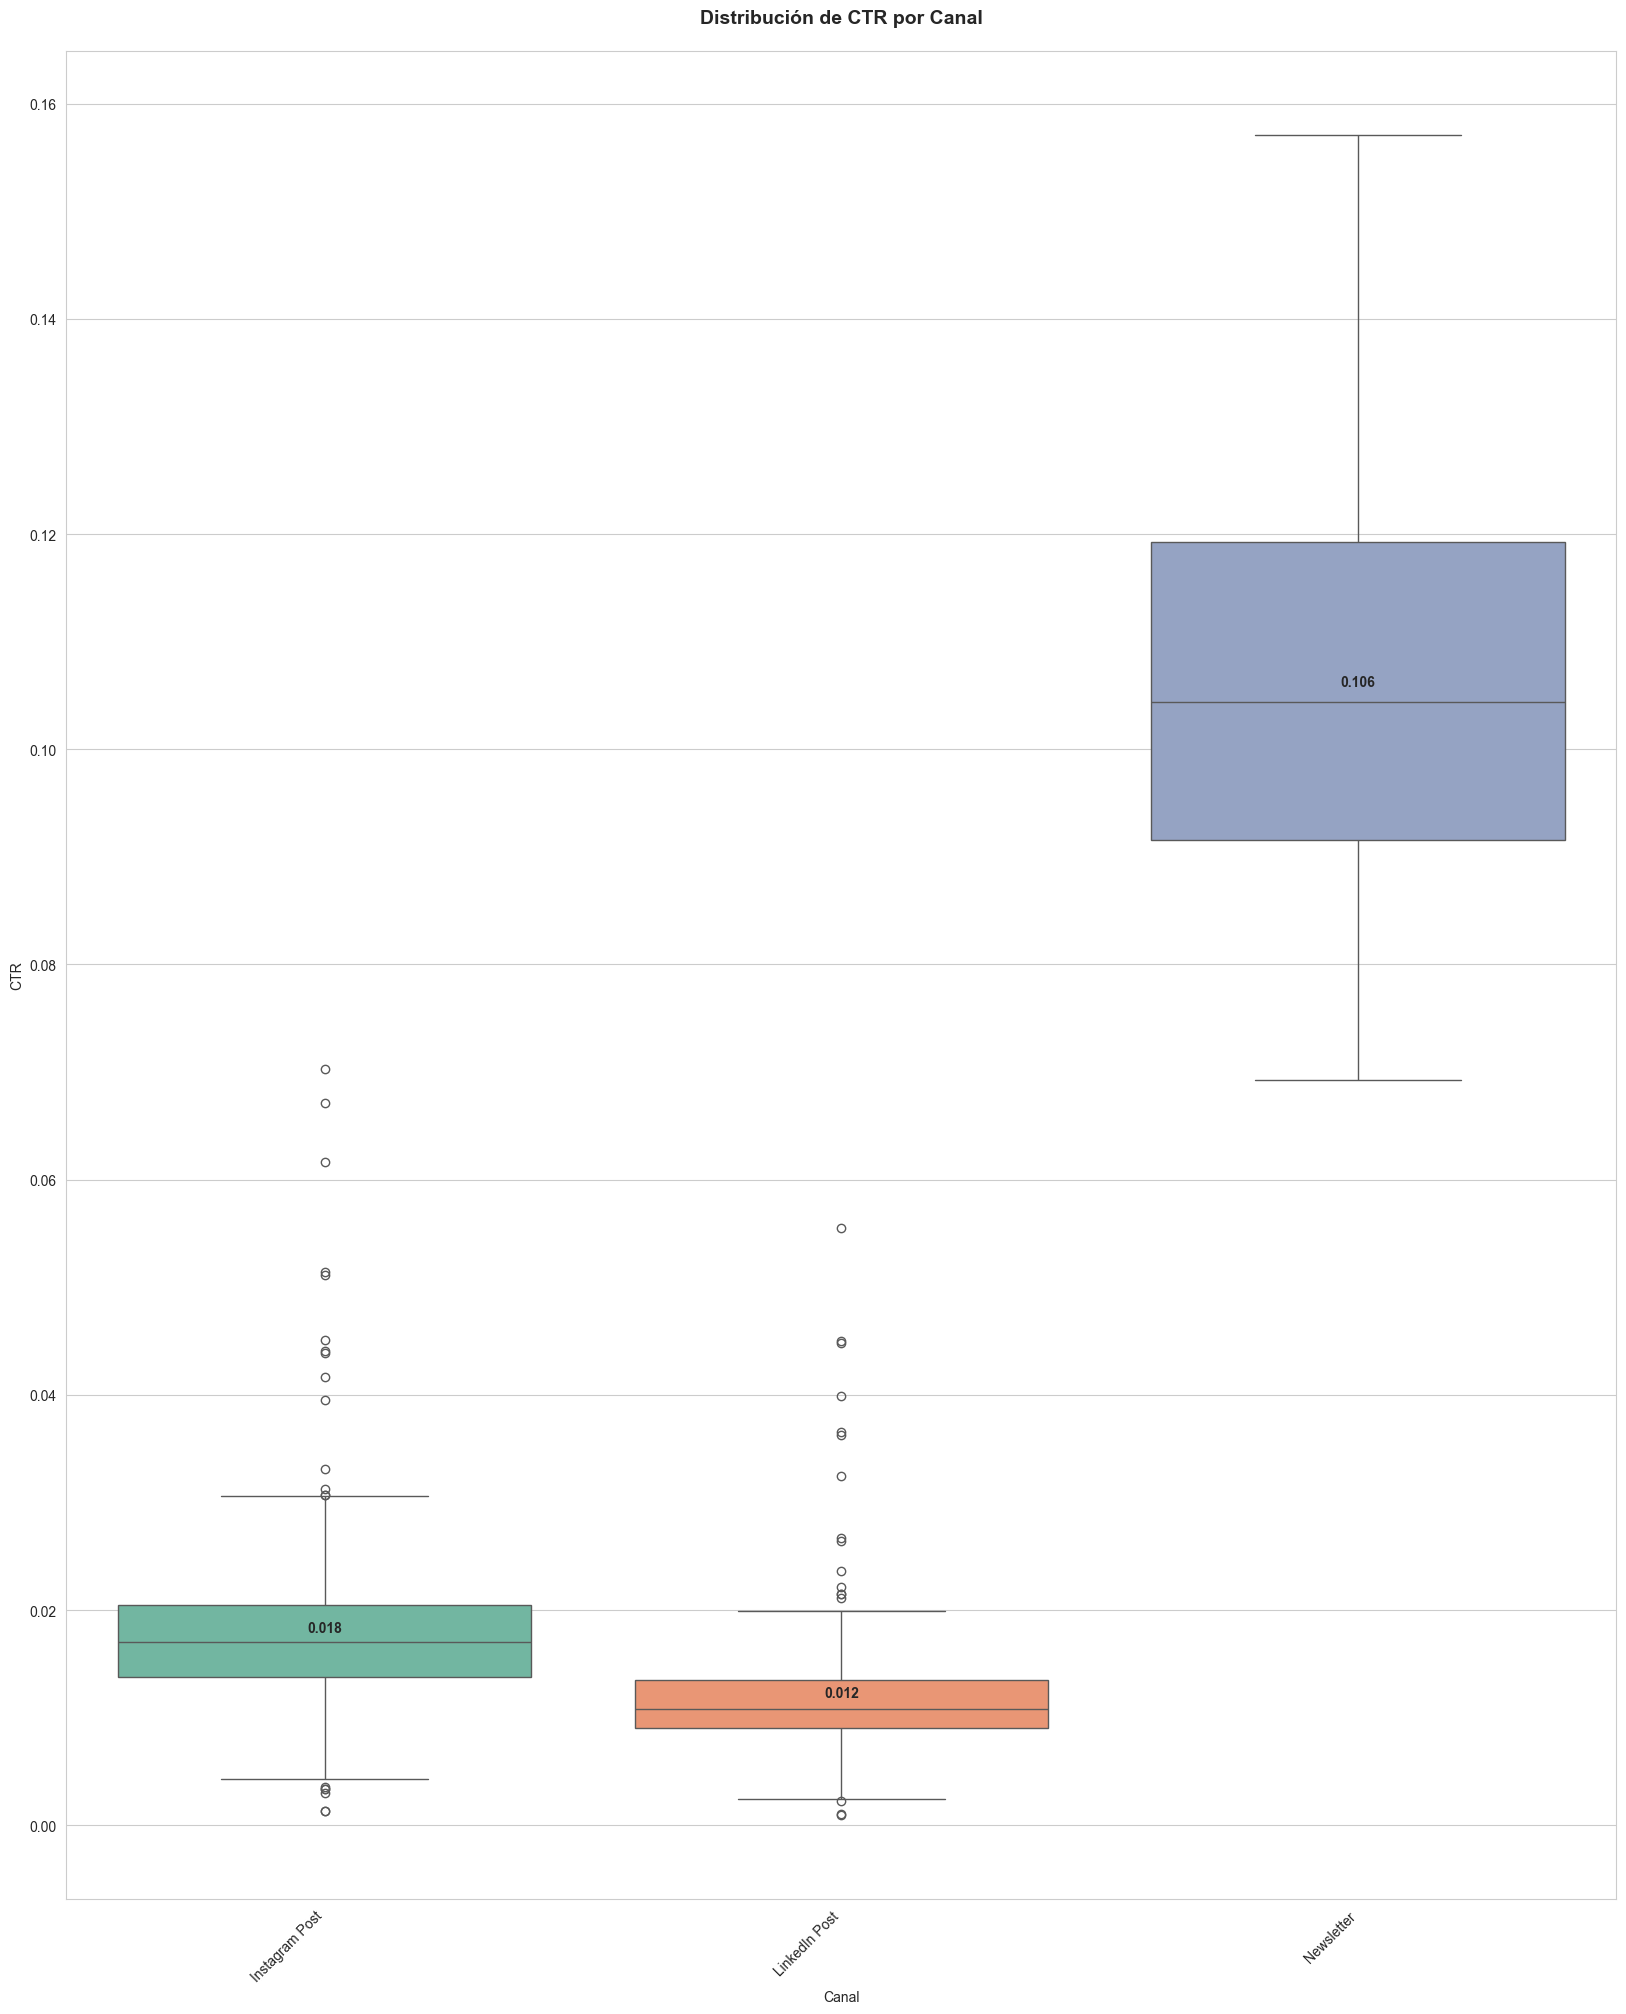

In [18]:
plt.Subplot(fig, 4, 3, 1)
boxplot = sns.boxplot(data=df, x='Action_Type', y='CTR', palette='Set2')
plt.title('Distribución de CTR por Canal', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('CTR')
plt.xlabel('Canal')
'''Añadir valores medios'''
for i, channel in enumerate(df['Action_Type'].unique()):
    mean_val = df[df['Action_Type'] == channel]['CTR'].mean()
    plt.text(i, mean_val, f'{mean_val:.3f}', ha='center', va='bottom', fontweight='bold')

## 2. Impresiones por canal

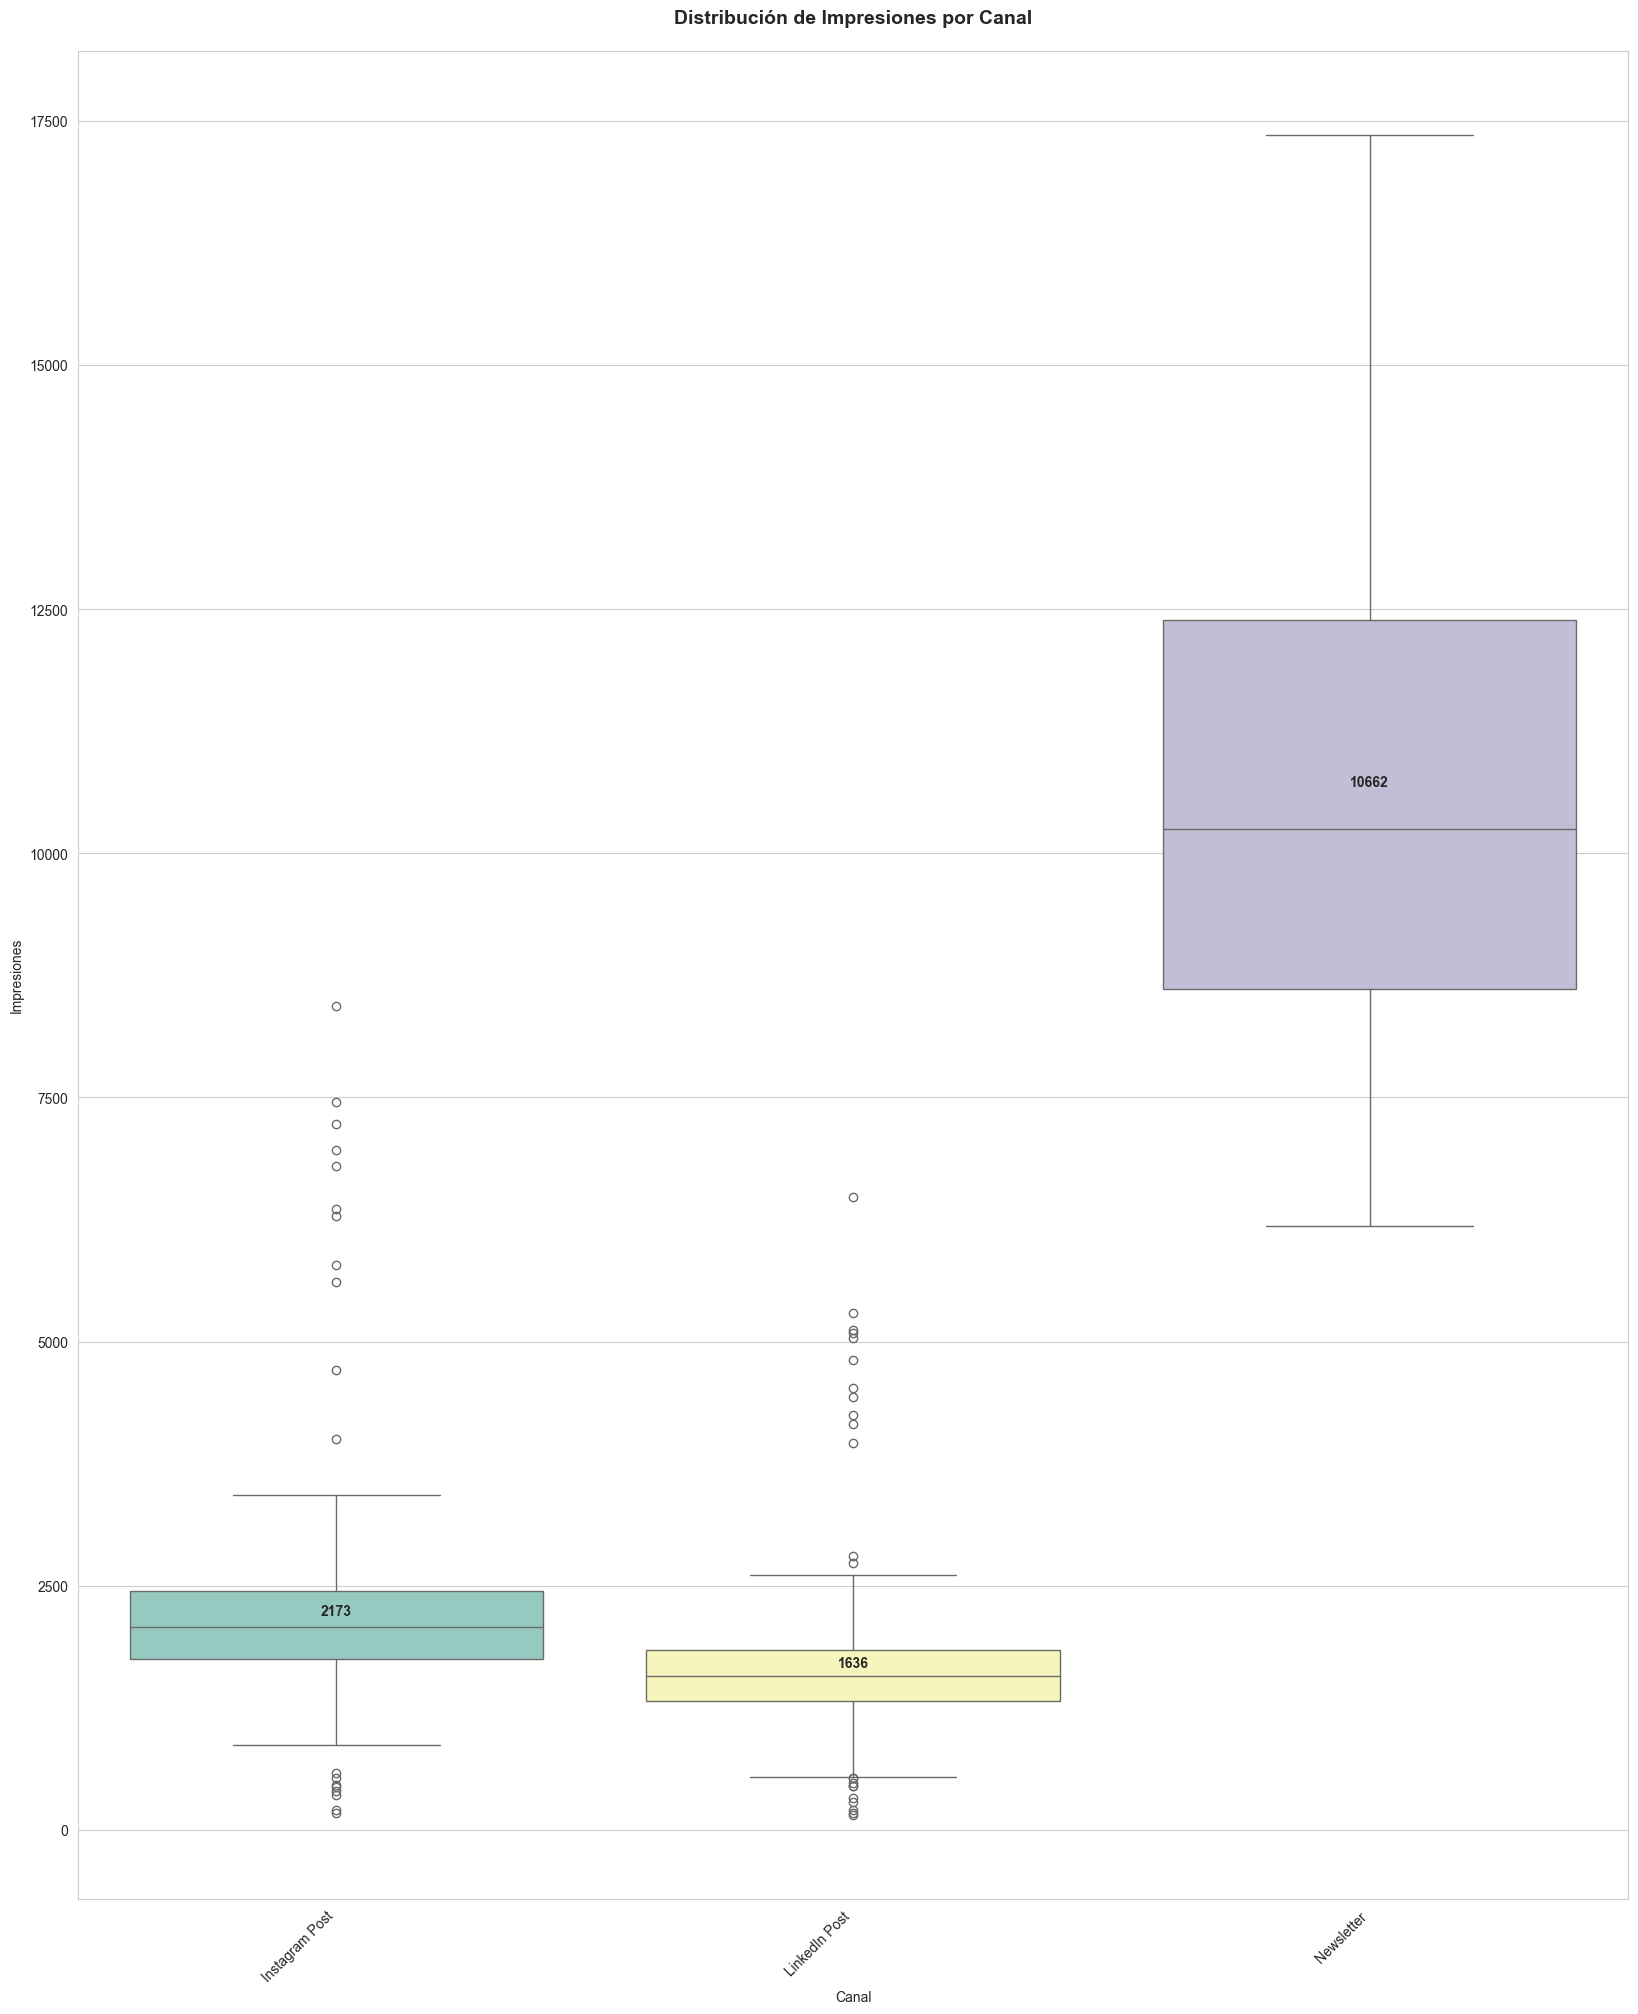

In [20]:
plt.Subplot(fig, 4, 3, 2)
sns.boxplot(data=df, x='Action_Type', y='Impressions', palette='Set3')
plt.title('Distribución de Impresiones por Canal', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Impresiones')
plt.xlabel('Canal')
'''Añadir valores medios'''
for i, channel in enumerate(df['Action_Type'].unique()):
    mean_val = df[df['Action_Type'] == channel]['Impressions'].mean()
    plt.text(i, mean_val, f'{mean_val:.0f}', ha='center', va='bottom', fontweight='bold')

## 3. CTR por idioma

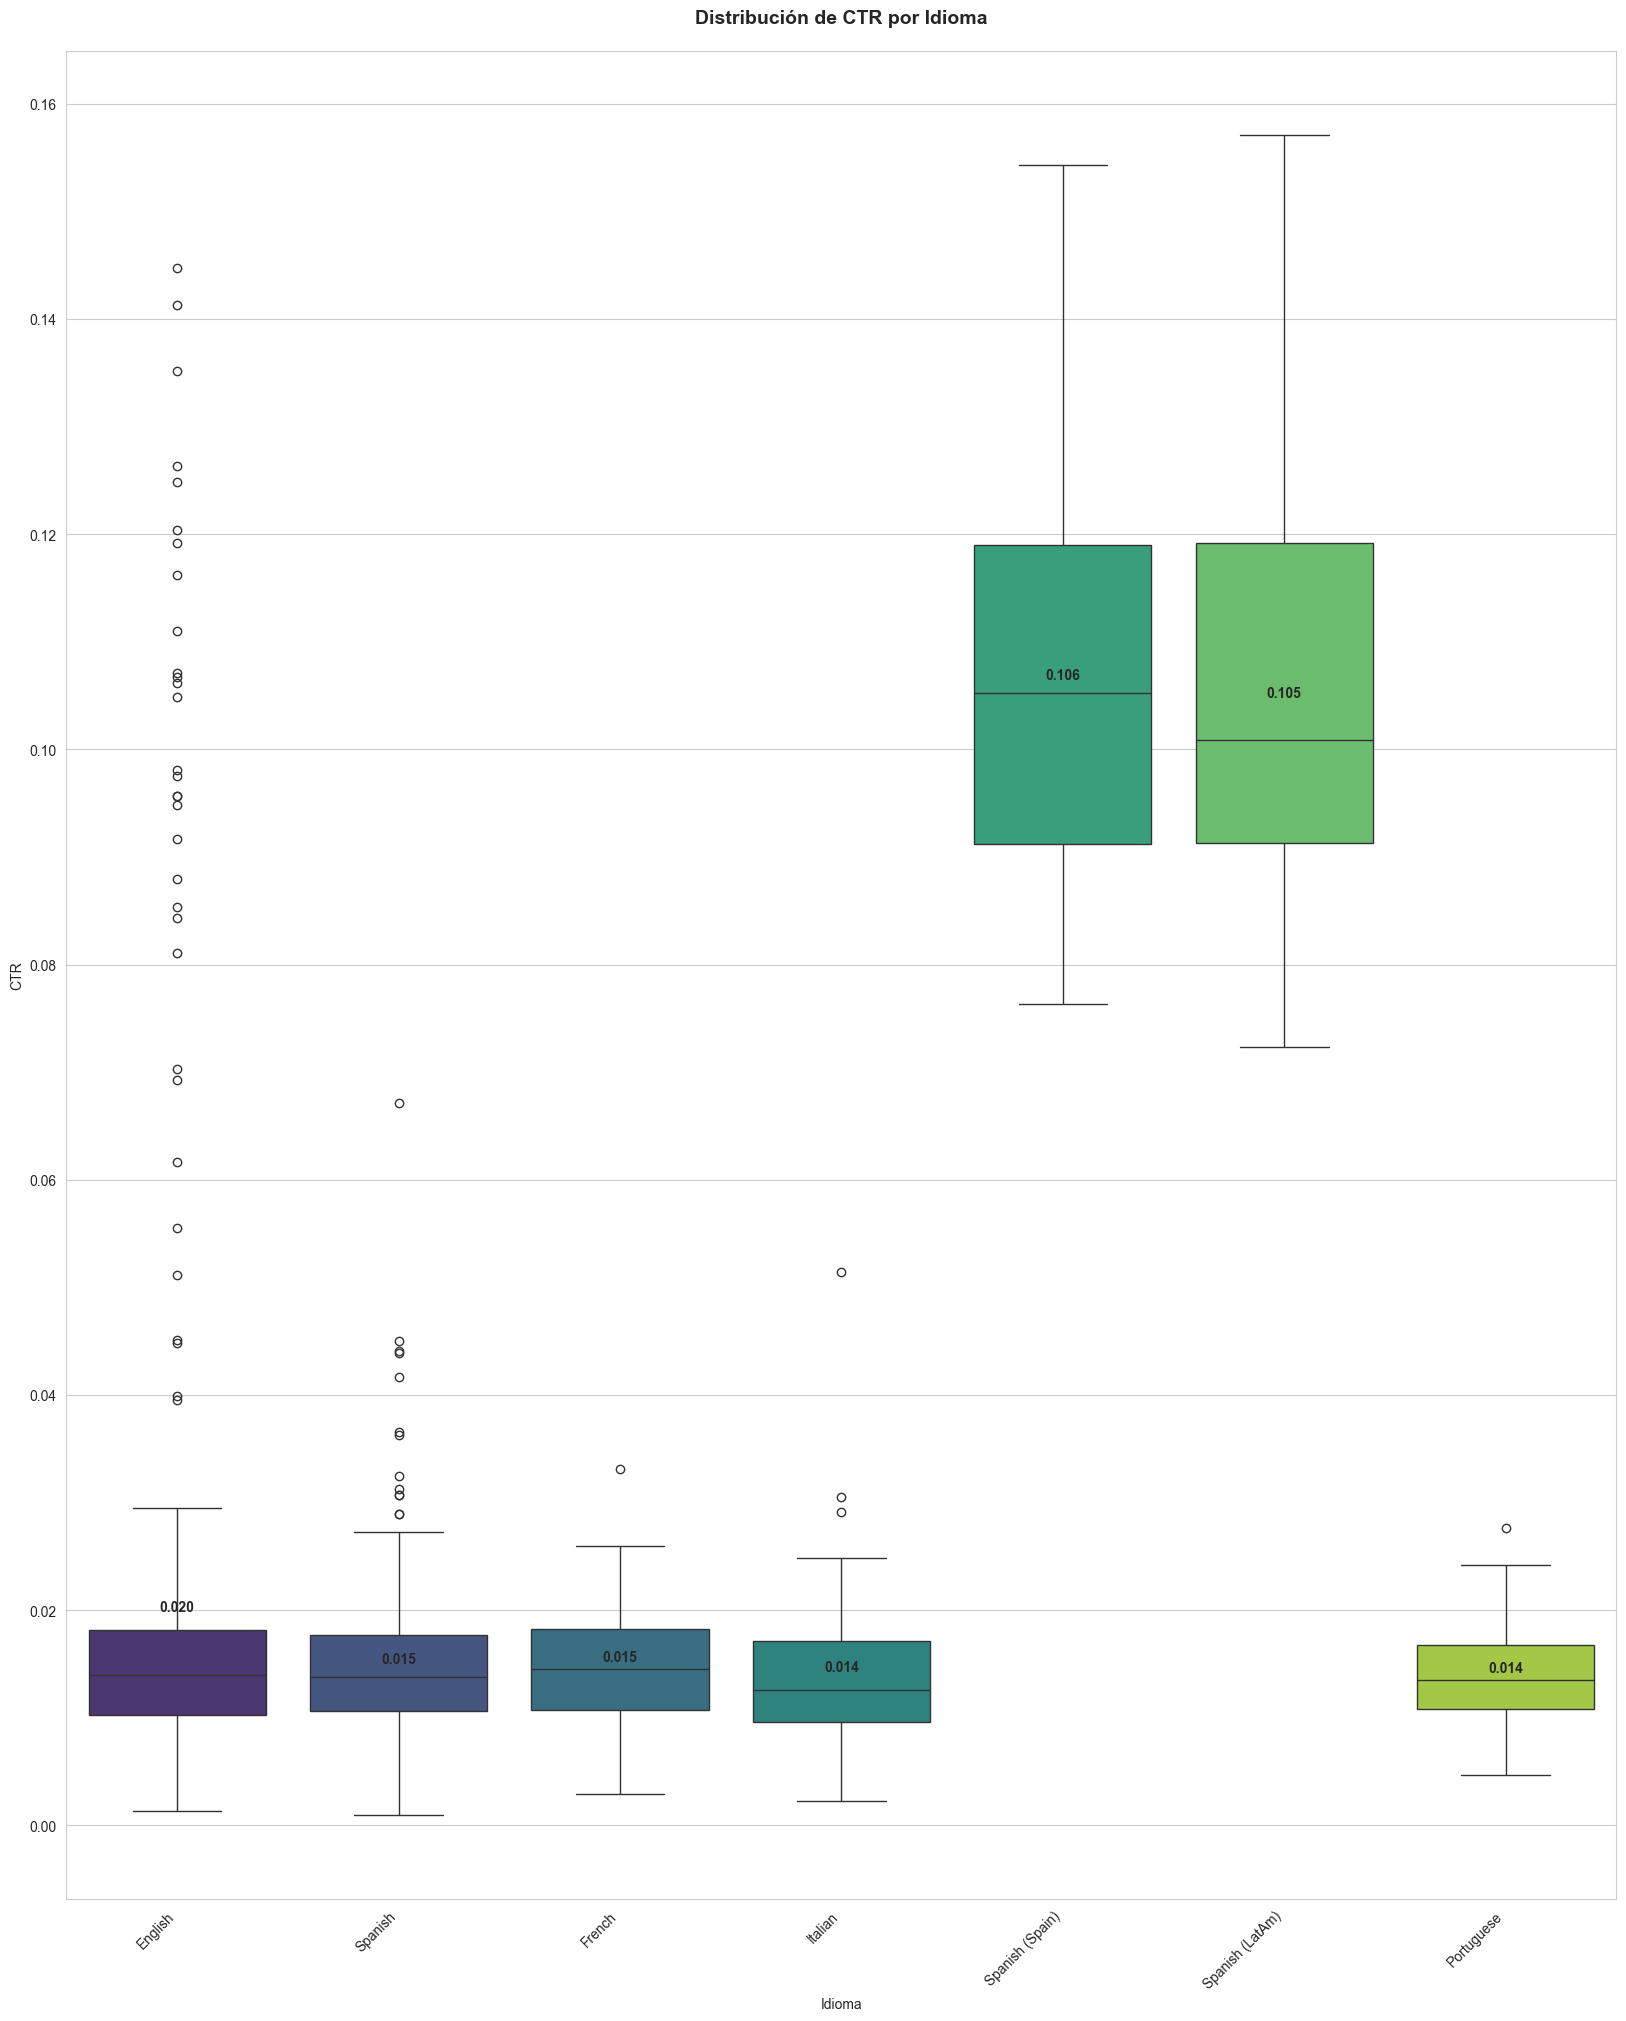

In [21]:
plt.Subplot(fig, 4, 3, 3)
sns.boxplot(data=df, x='Language', y='CTR', palette='viridis')
plt.title('Distribución de CTR por Idioma', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('CTR')
plt.xlabel('Idioma')
'''Añadir valores medios'''
for i, lang in enumerate(df['Language'].unique()):
    mean_val = df[df['Language'] == lang]['CTR'].mean()
    plt.text(i, mean_val, f'{mean_val:.3f}', ha='center', va='bottom', fontweight='bold')

## 4. Performance por día de la semana

In [ ]:
plt.Subplot(fig, 4, 3, 4)
dia_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_dia_orden =